In [1]:
import os
import pandas as pd

data_dir = "round-1-island-data-bottle"
df_dict = {}

for filename in os.listdir(data_dir):
    if "nn" in filename:
        print(f"Reading {filename}...")
        df_dict[filename] = pd.read_csv(os.path.join(data_dir, filename), delimiter=";")

Reading trades_round_1_day_-1_nn.csv...
Reading trades_round_1_day_-2_nn.csv...
Reading trades_round_1_day_0_nn.csv...


<Axes: xlabel='timestamp'>

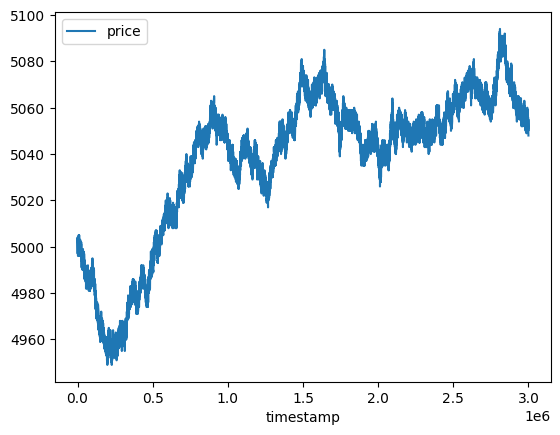

In [2]:
filenames = ["trades_round_1_day_-2_nn.csv", "trades_round_1_day_-1_nn.csv", "trades_round_1_day_0_nn.csv"]

starfruit_df = None

for idx, filename in enumerate(filenames):
    df = df_dict[filename]

    if starfruit_df is None:
        starfruit_df = df
    else:
        df["timestamp"] = df["timestamp"] + (idx * 1000000)
        starfruit_df = pd.concat([starfruit_df, df], ignore_index=True)

starfruit_df = starfruit_df[starfruit_df["symbol"] == "STARFRUIT"]
starfruit_df.plot(x="timestamp", y="price")

In [3]:
from sklearn.linear_model import LinearRegression
print(f"Number of rows: {len(starfruit_df.index)}")

starfruit_prices = pd.Series(starfruit_df["price"].values, index=starfruit_df["timestamp"])
X = [list(window) for window in starfruit_prices.rolling(window=5)][4:] # Discord first 4
y = [window[-1] for window in X]

X = [window[:-1] for window in X] # Remove last element

# y = a * x_0 + b * x_1 + c * x_2 + d * x_3 + e
reg = LinearRegression().fit(X, y)
print(f"R^2 score: {reg.score(X, y)}")
print(f"Coefficients: {reg.coef_}, intercept: {reg.intercept_}")

print(X[0][0] * reg.coef_[0] + X[0][1] * reg.coef_[1] + X[0][2] * reg.coef_[2] + X[0][3] * reg.coef_[3])
print(y[0])

Number of rows: 8915
R^2 score: 0.9905584776218741
Coefficients: [0.19276398 0.22111366 0.24350053 0.34038018], intercept: 11.302935408693884
4989.476847296161
4997.0


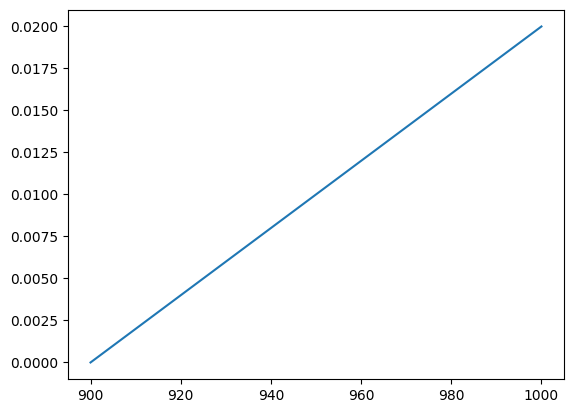

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

class linear_pmf(st.rv_discrete):
    def _pmf(self, x):
        return 0.0002*x - 0.18 # Normalized over its range, in this case [0,1]

goldfish_pmf = linear_pmf(a=900, b=1000)

xs = np.arange(900, 1001)
plt.plot(xs, goldfish_pmf.pmf(xs))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [23:59<00:00, 14.25s/it]


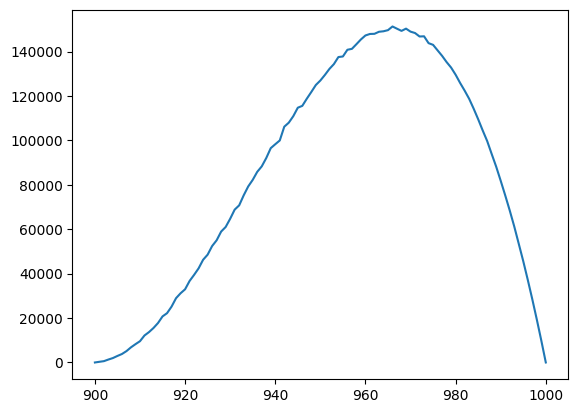

In [5]:
from tqdm import tqdm

bids = np.arange(900, 1001)
expected_profits = []
num_goldfish = 10000
num_experiments = 10

for bid in tqdm(bids):
    expected_profit = 0
    
    # Run the experiment 10 times each
    for _ in range(num_experiments):
        reserve_prices = goldfish_pmf.rvs(size=num_goldfish)
        profits = [1000 - bid if bid >= price else 0 for price in reserve_prices]
        expected_profit += sum(profits)

    expected_profits.append(expected_profit / num_experiments)

plt.plot(bids, expected_profits)

In [6]:
print(expected_profits)
print(f"Bid with highest expected profits: {bids[np.argmax(expected_profits)]}")
print(f"Highest expected profits: {max(expected_profits)}")

[0.0, 306.9, 597.8, 1328.9, 1996.8, 2945.0, 3816.4, 5115.0, 6817.2, 8244.6, 9585.0, 12157.4, 13684.0, 15538.2, 17776.2, 20748.5, 22201.2, 25149.0, 28962.4, 31168.8, 32952.0, 36703.4, 39452.4, 42396.2, 46253.6, 48547.5, 52436.4, 55027.4, 58953.6, 61017.4, 64715.0, 68834.4, 70767.6, 75274.5, 79266.0, 82231.5, 85843.2, 88300.8, 92051.4, 96520.3, 98280.0, 99981.4, 106180.6, 107992.2, 110924.8, 114730.0, 115570.8, 118799.5, 121825.6, 124960.2, 126975.0, 129467.8, 132177.6, 134358.9, 137544.6, 137803.5, 140826.4, 141237.8, 143333.4, 145480.3, 147268.0, 147942.6, 148010.0, 148928.7, 149151.6, 149660.0, 151313.6, 150308.4, 149328.0, 150343.8, 148992.0, 148364.0, 146806.8, 146888.1, 143806.0, 143042.5, 140556.0, 138085.1, 135280.2, 132801.9, 129582.0, 125871.2, 122428.8, 118750.1, 114300.8, 109548.0, 104521.2, 99710.0, 93883.2, 88157.3, 81817.0, 75255.3, 68461.6, 61266.8, 53470.8, 45616.5, 37238.0, 28517.7, 19399.0, 9902.7, 0.0]
Bid with highest expected profits: 966
Highest expected profits: 1